In [7]:
import API_functions.file_single as fs
import API_functions.image_info as info
import API_functions.threshold_method_choose as method_choose
import API_functions.pre_process as pre
import numpy as np
import matplotlib.pyplot as plt

Reading Completed!


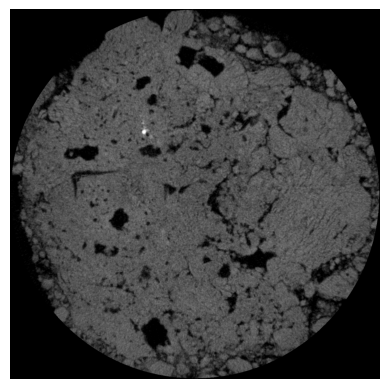

In [8]:
path = "./data/q1.1 (305).bmp"
image = fs.read_image_opencv(path)
fs.show_image(image)

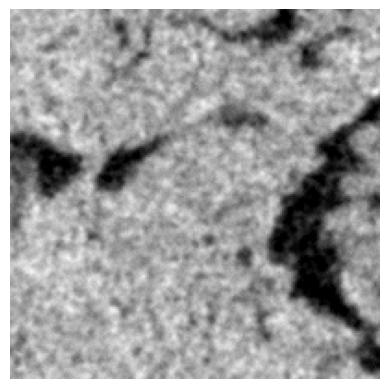

In [9]:
image_gray = pre.rgb2gray(image)
image_roi = pre.image_cut(image_gray, image_gray.shape[0]//2, image_gray.shape[1]//2, 200)
fs.show_image(image_roi)

In [10]:
info.get_info(image_roi)

Image size: (200, 200)
Image is grayscale, not binary image
Getting information completed!


In [11]:
def image_comprehensive_process(image, pre_name, seg_name):
    # Method chooses
    pro_processor, params = method_choose.pre_method_choose(pre_name)
    segmentor, independent = method_choose.seg_method_choose(seg_name)
    
    if 'gamma_value' in params:
        params['gamma_value'] = 0.5

    # Implement
    pre_processed_image = pro_processor(image, **params)
    segmented_image = segmentor(pre_processed_image)
    
    # The independent methods' output is a [-1, ] image due to adopted to 3D images,
    # so we need to reshape it to the original shape
    if independent:
        segmented_image = segmented_image.reshape(image.shape)
        
    # Calculate pore percentage
    if seg_name == 'origin':
        pore = None
    else:
        pore = info.calculate_pore_percentage(segmented_image)

    return pore, pre_processed_image, segmented_image

[[    nan     nan     nan     nan]
 [16.43   29.465  48.4975 15.69  ]
 [19.385  38.64   22.38   18.75  ]
 [16.43   29.465  48.4975 15.69  ]
 [15.66   11.085  48.4975 16.0475]
 [19.3275 28.7725 50.6725 19.0375]]


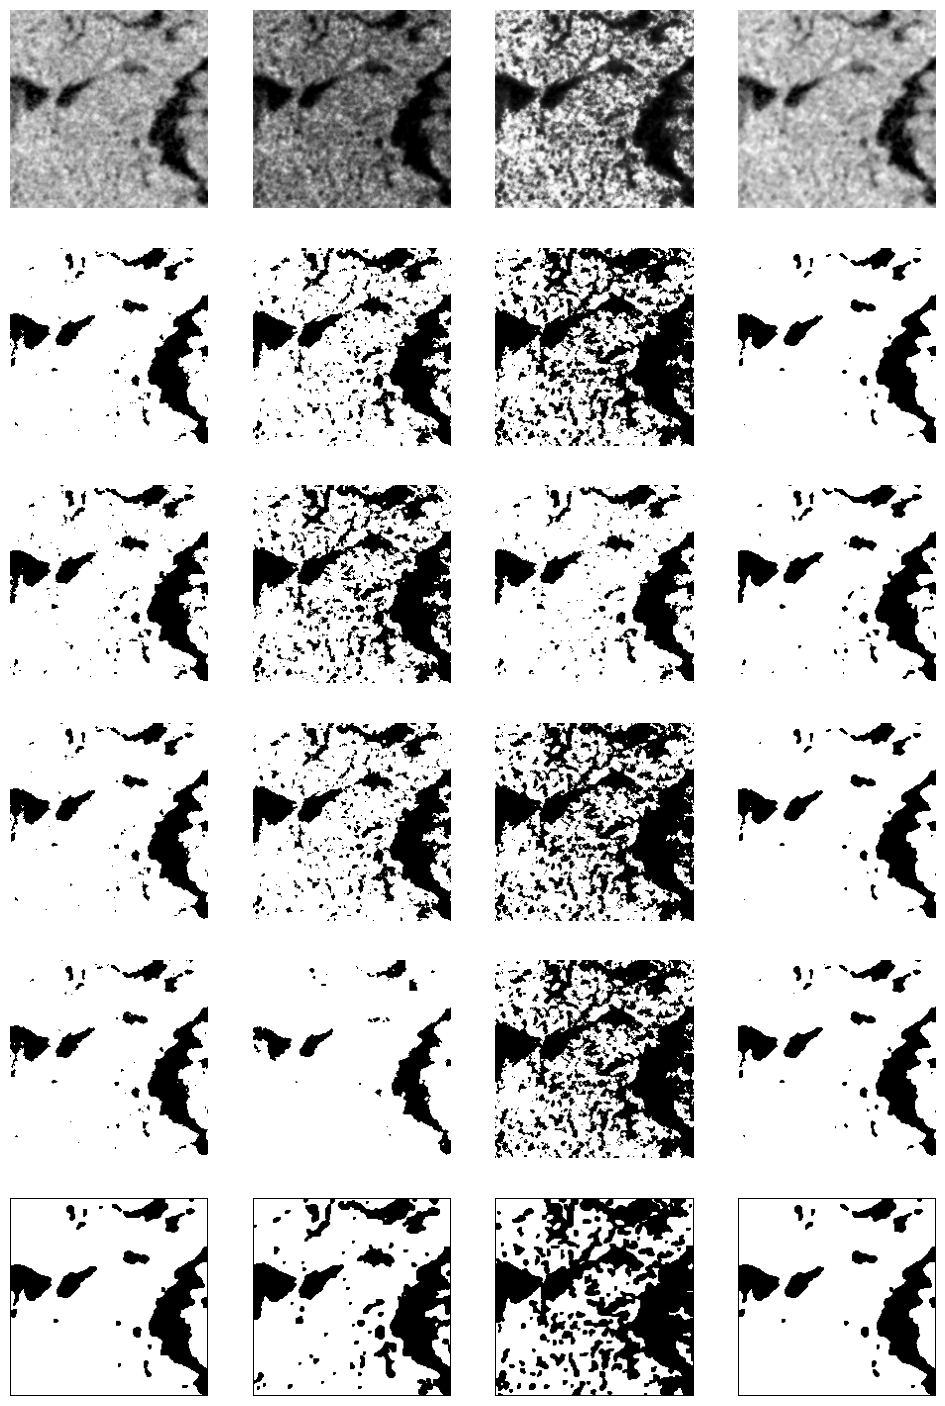

In [12]:
method_name_list = ['origin', 'otsu', 'kapur_entropy', 'kmeans', 'gmm', 'watershed']
pre_process_list = ['origin', 'gamma', 'equalized', 'median']

pore_list = np.zeros([len(method_name_list), len(pre_process_list)])
fig, ax = plt.subplots(len(method_name_list), len(pre_process_list), figsize=(12, 18))

for i, seg in enumerate(method_name_list):
    for j, pre_process in enumerate(pre_process_list):
        pore_percent, pre_processed, segmented = image_comprehensive_process(image_roi, pre_process, seg)
        pore_list[i, j] = pore_percent
        ax[i, j].imshow(segmented, cmap='gray')
        ax[i, j].axis('off')

print(pore_list)